## Exercise 1: Basic Complex Number Operations
1. Manually calculate and then verify using Python the result of `(3 + 4j) + (1 - 2j)`, `(5 + 6j) * (7 - 8j)`, and `(2 - 3j) / (1 + 4j)`.
2. Find the conjugate and modulus of `(3 - 4j)`.


 Manually :
 * `(3 + 4j) + (1 - 2j)` = `(4 + 2j)` 
 * `(5 + 6j) * (7 - 8j)` =,` (83 +2j)`
 * `(2 - 3j) / (1 + 4j)` = `(-10/17 -11/17 j) `

In [3]:
print("Suma:",complex(3,4)+ complex(1,-2))
print("Multiplicación:",complex(5,6)* complex(7,-8))
print("División:",complex(2,-3) / complex(1,4))
print("Conjugado:",complex(3,-4).conjugate())
print("Módulo:", abs(complex(3,-4)))


Suma: (4+2j)
Multiplicación: (83+2j)
División: (-0.5882352941176471-0.6470588235294118j)
Conjugado: (3+4j)
Módulo: 5.0


Suma: (4+2j)
Multiplicación: (83+2j)
División: (-0.5882352941176471-0.6470588235294118j)
Conjugado: (3+4j)
Módulo: 5.0


## Exercise 2: Visualizing Complex Operations
1. Write a Python function to plot a complex number on the complex plane. Use it to plot `(3 + 4j)` and its conjugate.
2. Extend the function to show addition and multiplication of two complex numbers graphically.

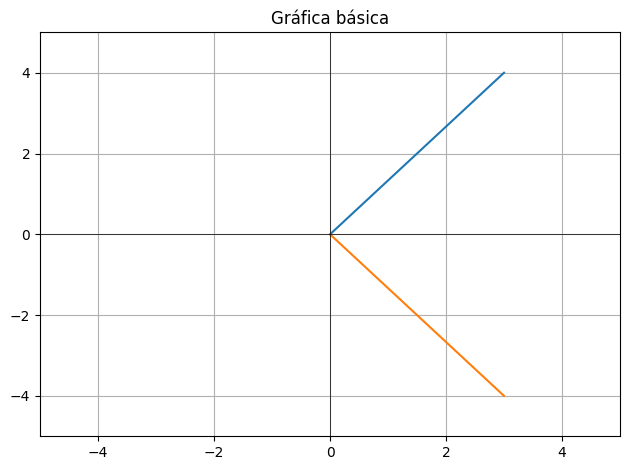

In [40]:
import cmath
import matplotlib.pyplot as plt
import numpy as np


def graficar(z,z1):
    ax = plt.subplot()
    ax.plot([0,z.real],[0,z.imag])
    ax.plot([0,z1.real],[0,z1.imag])
    ax.set_xlim(-5,5)
    ax.set_ylim(-5,5)
    ax.set_xlabel = ("Real") #no muestra
    ax.set_ylabel = ("Imaginary") #no muestra
    ax.axhline(0,color = "black", linewidth = 0.5)
    ax.axvline(0,color = "black", linewidth = 0.5)
    ax.grid(True)
    plt.title("Gráfica básica")
    plt.tight_layout() ###
    plt.show()
    

if __name__ == "__main__":
    z = complex(3,4)
    z1 = z.conjugate()
    graficar(z,z1)


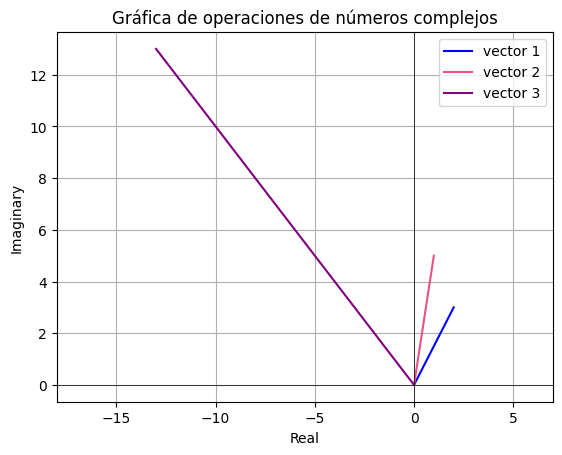

In [5]:
import cmath
import matplotlib.pyplot as plt
import numpy as np

def graficar(z,z1,z2):
    """ Función que grafica 3 números complejos dados
    (cplx,cplx,cplx)-> None
    """
    ax = plt.subplot()
    ax.plot([0,z.real],[0,z.imag],color="blue", label ="vector 1")
    ax.plot([0,z1.real],[0,z1.imag],color="#E75480",label = "vector 2" )
    ax.plot([0,z2.real],[0,z2.imag], color = "Purple", label="vector 3",)
    ax.set_xlim(min(z.real-5,z1.real-5,z2.real-5),max(z.real+5,z1.real+5,z2.real+5))
    ax.set_ylim = (-10,10)
    ax.set_xlabel ("Real") 
    ax.set_ylabel ("Imaginary")
    ax.axhline(0,color = "black", linewidth = 0.5)
    ax.axvline(0,color = "black", linewidth = 0.5)
    ax.grid(True)
    plt.title("Gráfica de operaciones de números complejos")
    plt.legend()
    plt.show()
    

if __name__ == "__main__":

    z = complex(input(" z : ")) # uso de j para imaginarios
    z1 = complex(input("z1: "))
    num = int(input("si desea sumar presione 1 , si desea multiplicar presione 2"))
    if num == 1 : z2 = z+z1
    elif num == 2 : z2 = z*z1
    else :
        z2= 0
        print("No ha elegido una opción valida para operar")

    graficar(z,z1,z2)


## Exercise 3: Exploring the Mandelbrot Set
1. Modify the provided Mandelbrot set code to change its zoom level and center point. Observe how the fractal pattern changes.
2. Experiment with different values of `max_iter` and observe the effect on the fractal's detail and computation time.

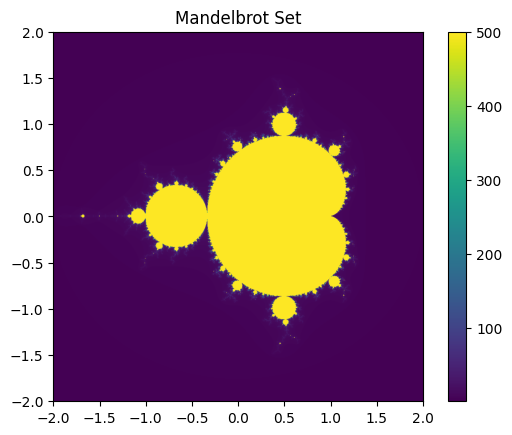

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(c, max_iter):
    z = 0
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter

# Create a grid of complex numbers
pixels = 800
max_iter = 500 # cantidad de detalle
x = np.linspace(-2, 1, pixels)
y = np.linspace(-1.5, 1.5, pixels)
xx, yy = np.meshgrid(x, y) 
c = xx + yy*1j #np array vs complex

# Compute Mandelbrot set
mandelbrot_set = np.array([mandelbrot(ci, max_iter) for ci in c.ravel()]).reshape(c.shape)

a,b=map(int,input("ingrese los niveles de zoom (-x,x):").split(","))
plt.imshow(mandelbrot_set, extent=[a, b, a, b]) #zoom
plt.colorbar()
plt.title("Mandelbrot Set")
plt.show()


## Exercise 4: Creating a Julia Set
1. Implement a Julia set generator. Use a constant like `-0.4 + 0.6j` for the iteration `z = z*z + constant`.
2. Explore how changing the constant changes the pattern of the Julia set.

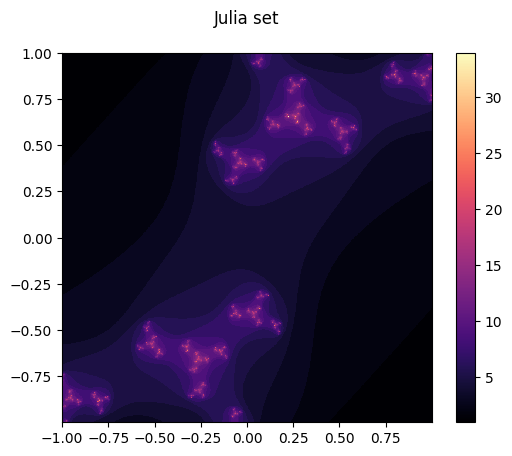

In [15]:
import matplotlib.pyplot as plt
constante = complex(input())
rango = 1 + abs(constante)
max_iterations = 100
#coordenadas
x1, y1 = -1,1
x2, y2 = 1,-1
res_lineal = 500 

m, n = abs(int((y2-y1)*res_lineal)),abs(int((x2-x1)*res_lineal))

coord_x = [(x1 + ((x2-x1)/n)*i)for i in range(n)] 

coord_y= [(y1 + ((y2-y1)/m)*i)for i in range(m)]

juliaSet = [[0 for i in coord_x]for j in coord_y]

for y in range (len(coord_y)):
    for x in range(len(coord_x)):
        num = complex(coord_x[x],coord_y[y])
        iterations = 0
        while (abs(num) < rango and iterations < max_iterations ):
            iterations += 1
            num = num**2 + constante # z^2 + constante
        
        if iterations == max_iterations: juliaSet[y][x]= 0
        else: juliaSet[y][x] = iterations

#Gráfica
ax = plt.axes()
ax.set_aspect("equal") # x=y
plot = ax.pcolormesh(coord_x,coord_y,juliaSet,cmap="magma",shading="auto") # mapa de calor
plt.colorbar(plot)
plt.title("Julia set\n")
plt.show()

## Exercise 5: Complex Number Properties
1. Prove that the absolute value of a product of two complex numbers is the product of their absolute values.
2. Show that the conjugate of a sum of two complex numbers is the sum of their conjugates.

![Imagen de WhatsApp 2025-02-04 a las 20.49.16_b5653fe7.jpg](<attachment:Imagen de WhatsApp 2025-02-04 a las 20.49.16_b5653fe7.jpg>)
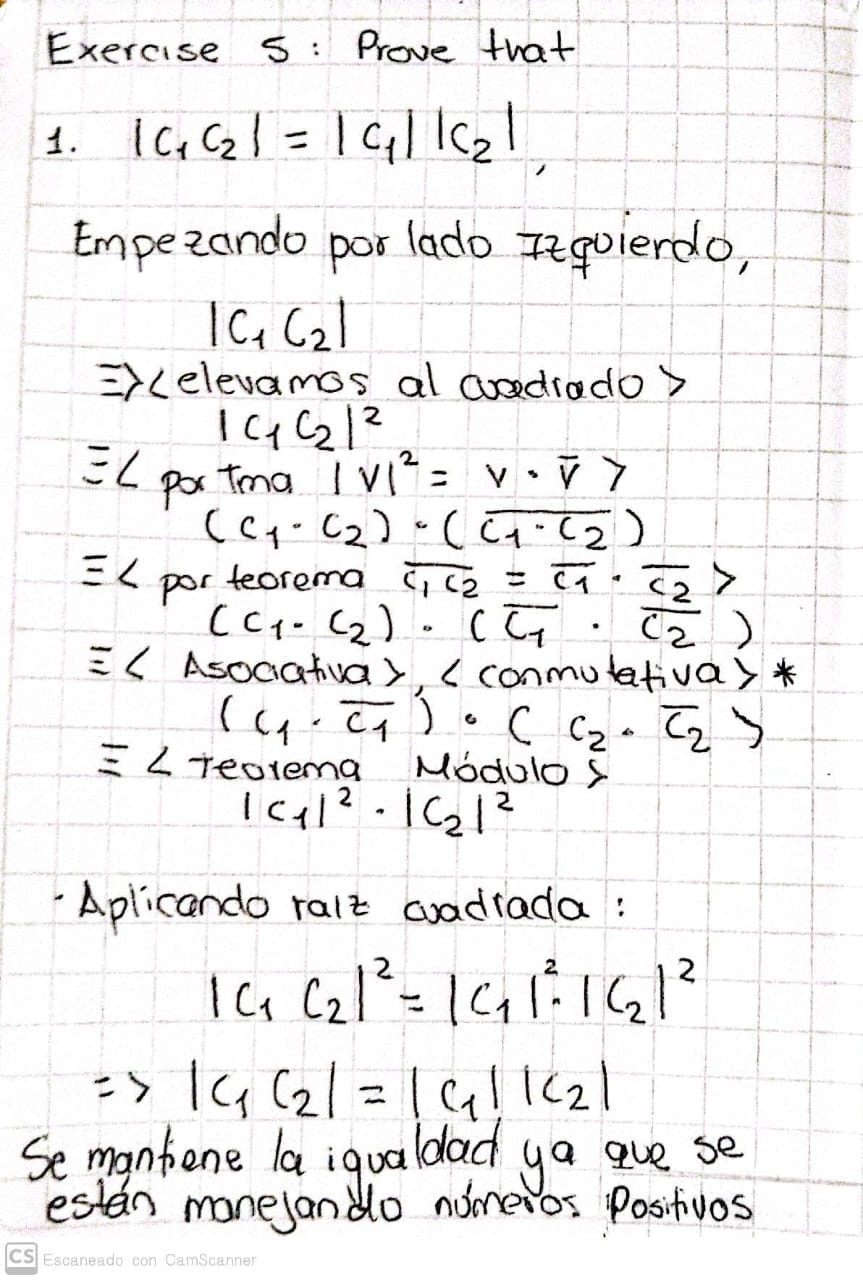


![Imagen de WhatsApp 2025-02-04 a las 20.36.55_dc4fac67.jpg](<attachment:Imagen de WhatsApp 2025-02-04 a las 20.36.55_dc4fac67.jpg>)
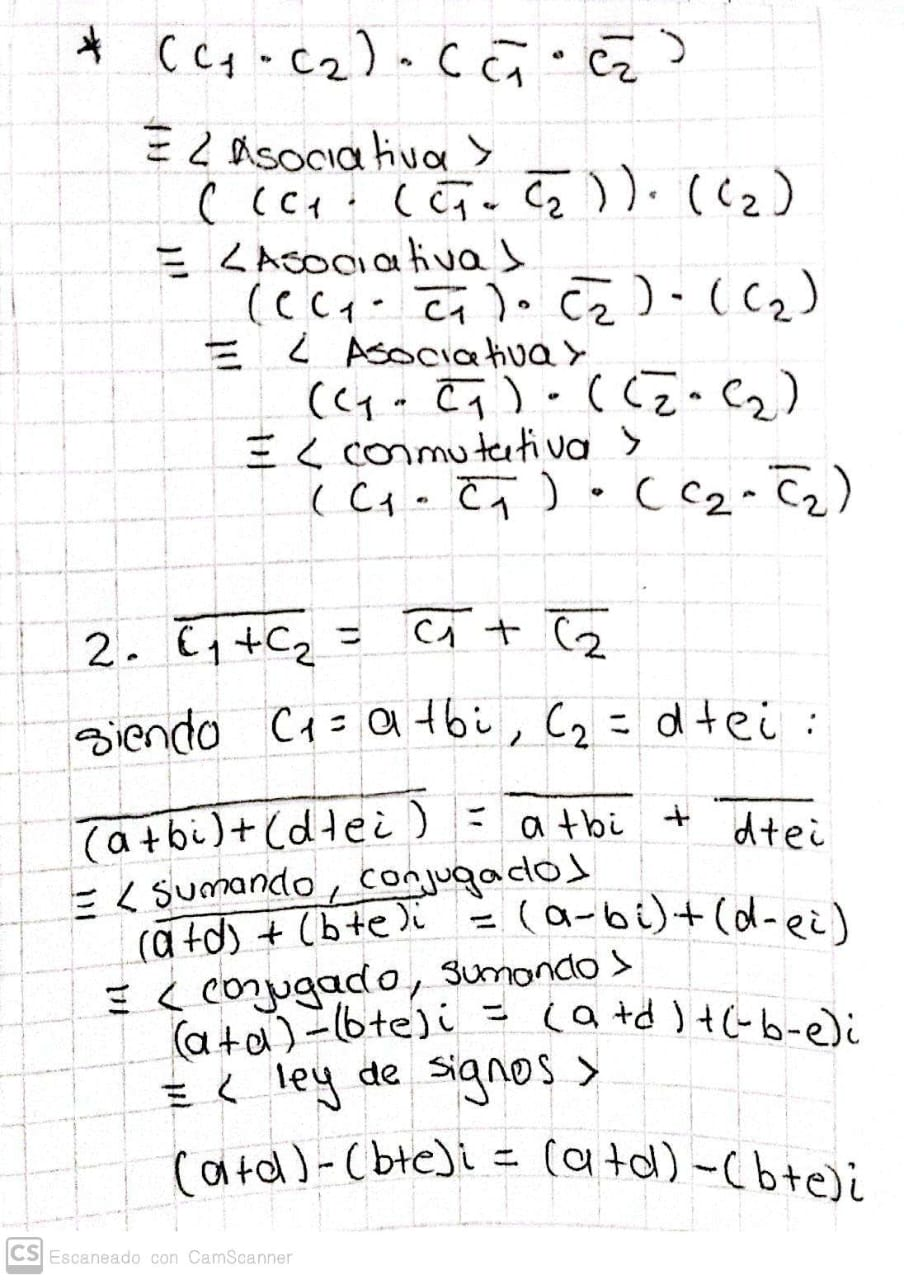